- **Importing keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

- **Importing models and layers from keras**
- **Importing mnist dataset**
- **Importing python utilities - numpy**


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

- **Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


- **Printing a image from the training dataset**

(60000, 28, 28)


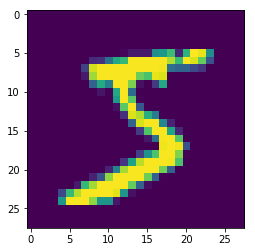

In [17]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

- **Reshaping the images as 28x28 matrix**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- **Normalizing both the training and test images
such that each value in the image will be b/w 0.0 and 1.0**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- **Listing the labels (from 0 to 9) for first 10 images**

In [20]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- **Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- **This is how the 10 Dimentional class matrix looks like
 The position of "1." at each row is basically the label
 of the image.**

In [22]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Second network(minimum parameters)
              
          
| Observation | Value |
| :------------------- | ---------------: |
| Total Parameters | 11,422  |
| Best Testing Accuracy | 99.5 |
| Best Validation Accuracy | 99.01 |
| Batch Size | 32 |
| Epochs | 20 |
| Overfitting | No effect |
| Optimizer | Adam |
| 3 Improvements over previous layer | Decreased the kernel parameterns in all the layers |




                    

In [23]:
from keras.layers import Activation
model = Sequential()

                                                     # Output channel dimensions | Receptive field
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 | 3x3

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24 | 5x5

model.add(MaxPooling2D(pool_size=(2, 2))) # 12 | 10x10
model.add(Convolution2D(10, 1, 1, activation='relu')) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) #  10 | 12x12
model.add(Convolution2D(16, 3, 3, activation='relu')) #   8 | 14x14
model.add(Convolution2D(16, 3, 3, activation='relu')) #   6 | 16x16
model.add(Convolution2D(16, 3, 3, activation='relu')) #   4 | 18x18


model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/i

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 16)          2320      
__________

- **Using stochastic gradient descent**

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


- **Training the model with batch size of 32 images and epoch = 20**

In [26]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.2714 - acc: 0.9146 - val_loss: 0.0984 - val_acc: 0.9703
Epoch 2/20
60000/60000 [==============================] - 40s 675us/step - loss: 0.0903 - acc: 0.9724 - val_loss: 0.0563 - val_acc: 0.9826
Epoch 3/20
60000/60000 [==============================] - 40s 660us/step - loss: 0.0649 - acc: 0.9805 - val_loss: 0.0464 - val_acc: 0.9858
Epoch 4/20
60000/60000 [==============================] - 42s 706us/step - loss: 0.0540 - acc: 0.9833 - val_loss: 0.0452 - val_acc: 0.9841
Epoch 5/20
60000/60000 [==============================] - 39s 647us/step - loss: 0.0460 - acc: 0.9856 - val_loss: 0.0469 - val_acc: 0.9856
Epoch 6/20
60000/60000 [==============================] - 40s 670us/step - loss: 0.0407 - acc: 0.9875 - val_loss: 0.0508 - val_acc: 0.9858
Epoch 7/20
60000/60000 [==============================] - 39s 646us/step - loss: 0.0372 - acc: 0.9886 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.04636300708114886, 0.9885]


- **Getting the prediction on first 9 images of test set from the trained model**

In [0]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[1.8827516e-18 2.0576184e-12 8.7028308e-11 1.0351948e-07 5.6666677e-12
  6.5159722e-10 3.7883392e-23 9.9999964e-01 3.0899356e-12 2.6394596e-07]
 [9.0745249e-15 2.7068958e-10 1.0000000e+00 6.1209576e-14 1.6282976e-12
  5.9654274e-14 1.5966216e-11 5.4334669e-15 5.6166335e-12 1.8996276e-13]
 [1.6007245e-13 9.9999440e-01 7.9997270e-10 4.1944781e-12 5.2069477e-06
  3.9309608e-10 5.3726841e-12 2.0637541e-09 3.1747862e-07 6.5255432e-09]
 [9.9998415e-01 7.9445294e-13 9.2423036e-10 3.3762382e-11 2.9436937e-12
  5.7398541e-08 1.5747695e-05 2.5436530e-14 3.8706710e-10 5.1222853e-09]
 [2.2046371e-20 1.4116072e-14 1.7991230e-15 5.5108517e-21 1.0000000e+00
  3.6850651e-20 9.6352819e-13 1.1200206e-13 8.7177681e-15 7.6055976e-12]
 [9.8903192e-15 9.9998772e-01 5.7620561e-11 1.2987154e-13 1.1908982e-05
  4.5854002e-12 2.5019028e-13 1.9713091e-09 3.0178859e-07 1.3605568e-09]
 [5.6284253e-21 6.3439002e-12 1.5246101e-13 5.5824665e-16 1.0000000e+00
  4.7980181e-15 6.5689163e-19 1.1346658e-09 1.5834762e-09 